In [1]:
import pandas as pd
import os

In [13]:
snr=['+6b']
machine=['valve'] #, 'pump', 'fan', 'slide'
id=['id_00', 'id_02', 'id_04', 'id_06']
condition=['abnormal', 'normal']

In [14]:
rows=[[a, b, c,d, e ]  for a in snr for b in machine for c in id for d in condition for e in os.listdir(a+'/'+b+'/'+c+'/'+d)]


In [37]:
df = pd.DataFrame(rows, columns=["snr", "machine", "id","condition", "file"])

In [38]:
df['path']=df.snr+'/'+df.machine+'/'+df.id+'/'+df.condition+'/'+df.file


In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [53]:
def load_sound(p):
    y, sr = librosa.load(p, sr=None)
    return y

In [59]:
df['y_array']=df.path.apply(load_sound)

In [60]:
df

,snr,machine,id,condition,file,path,y_array
0,+6b,valve,id_00,abnormal,00000000.wav,+6b/valve/id_00/abnormal/00000000.wav,"[0.004512787, 0.0027923584, 0.0039138794, 0.00..."
1,+6b,valve,id_00,abnormal,00000001.wav,+6b/valve/id_00/abnormal/00000001.wav,"[0.00037002563, 0.00010681152, -9.918213e-05, ..."
2,+6b,valve,id_00,abnormal,00000002.wav,+6b/valve/id_00/abnormal/00000002.wav,"[-0.007583618, -0.009666443, 0.006629944, -0.0..."
3,+6b,valve,id_00,abnormal,00000003.wav,+6b/valve/id_00/abnormal/00000003.wav,"[0.001739502, -0.00064849854, -0.0021858215, -..."
4,+6b,valve,id_00,abnormal,00000004.wav,+6b/valve/id_00/abnormal/00000004.wav,"[-0.00016784668, -0.00049209595, -0.0008201599..."
...,...,...,...,...,...,...,...
4165,+6b,valve,id_06,normal,00000987.wav,+6b/valve/id_06/normal/00000987.wav,"[-0.0031166077, -0.0039901733, -0.0045928955, ..."
4166,+6b,valve,id_06,normal,00000988.wav,+6b/valve/id_06/normal/00000988.wav,"[-0.00023651123, -0.00024795532, -0.0006599426..."
4167,+6b,valve,id_06,normal,00000989.wav,+6b/valve/id_06/normal/00000989.wav,"[0.00088500977, 0.0031547546, 0.00674057, 0.00..."
4168,+6b,valve,id_06,normal,00000990.wav,+6b/valve/id_06/normal/00000990.wav,"[0.002822876, 0.00333786, 0.0040359497, 0.0033..."


In [9]:
import numpy as np

In [61]:
# fast Fourier transform (FFT) 
def ftt(n_fft, y):
    ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
    return ft

#The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows


In [62]:
df['ft']= df.apply(lambda x: ftt(xftt, n_fft= 2048)

TypeError: ftt() got multiple values for argument 'n_fft'

In [30]:
ft

array([[0.10276182],
       [0.07148115],
       [0.04411872],
       ...,
       [0.00168671],
       [0.00291386],
       [0.00121233]], dtype=float32)

In [15]:
a=librosa.stft(y[:n_fft], hop_length = n_fft+1)

In [17]:
a

array([[-0.10276182+0.0000000e+00j],
       [ 0.07148115+2.6495191e-18j],
       [-0.04411872+1.5715882e-17j],
       ...,
       [ 0.00168671-5.1449108e-18j],
       [-0.00291386+6.4306741e-18j],
       [ 0.00121233+0.0000000e+00j]], dtype=complex64)

from paper/exp -> To calculate the Mel spectrogram, we consider a frame size of 1024, a hop
size of 512, and 64 mel filters in this experiment 

C:\Users\Daniel\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Daniel\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Daniel\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


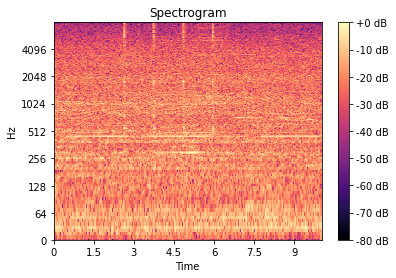

In [27]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');